# Getting the data

In [325]:
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Reading the csv file using pandas read_csv() function and storing it in a housing variable

In [326]:
housing = pd.read_csv("housing.csv")

Importing all the modules which are necessary

In [327]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [328]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [329]:
# # Question 2 - HW1 
# # (case A)
# # Using the predictor of the number of rooms (2) and normalizing it by population (4) 
# housing['total_rooms'] = housing['total_rooms']/ housing['population']

# # (case B)
# # Using the predictor of the number of rooms (2) and normalizing it by the number of households (5)
# housing['total_rooms'] = housing['total_rooms']/ housing['households']


# (case C)
# Using the predictor of the number of bedrooms (3) and normalizing it by the number of population (4), or
# housing['total_bedrooms'] = housing['total_bedrooms']/ housing['population']

# # (case D)
# # Using the predictor of the number of bedrooms (2) and normalizing it by the number of households (5)
# housing['total_bedrooms'] = housing['total_bedrooms']/ housing['households']



The ocean proximity contains categorical values so we are viewing the data using value_counts() to know the occurence of each value in the dataset.

In [330]:
from statistics import mean 
class SimpleLinearRegression: 
    def r_squared(self):
        self.y_mean = np.full((len(self.y)), mean(self.y))
        err_reg = sum((self.y - self.y_pred)**2)
        err_y_mean = sum((self.y - self.y_mean)**2)
        return (1 - (err_reg/err_y_mean))


In [331]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

head() returns the first 5 values in the dataframe.

In [332]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data visualisation


Plotting a histogram to visualize and understand more about the data


In [333]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

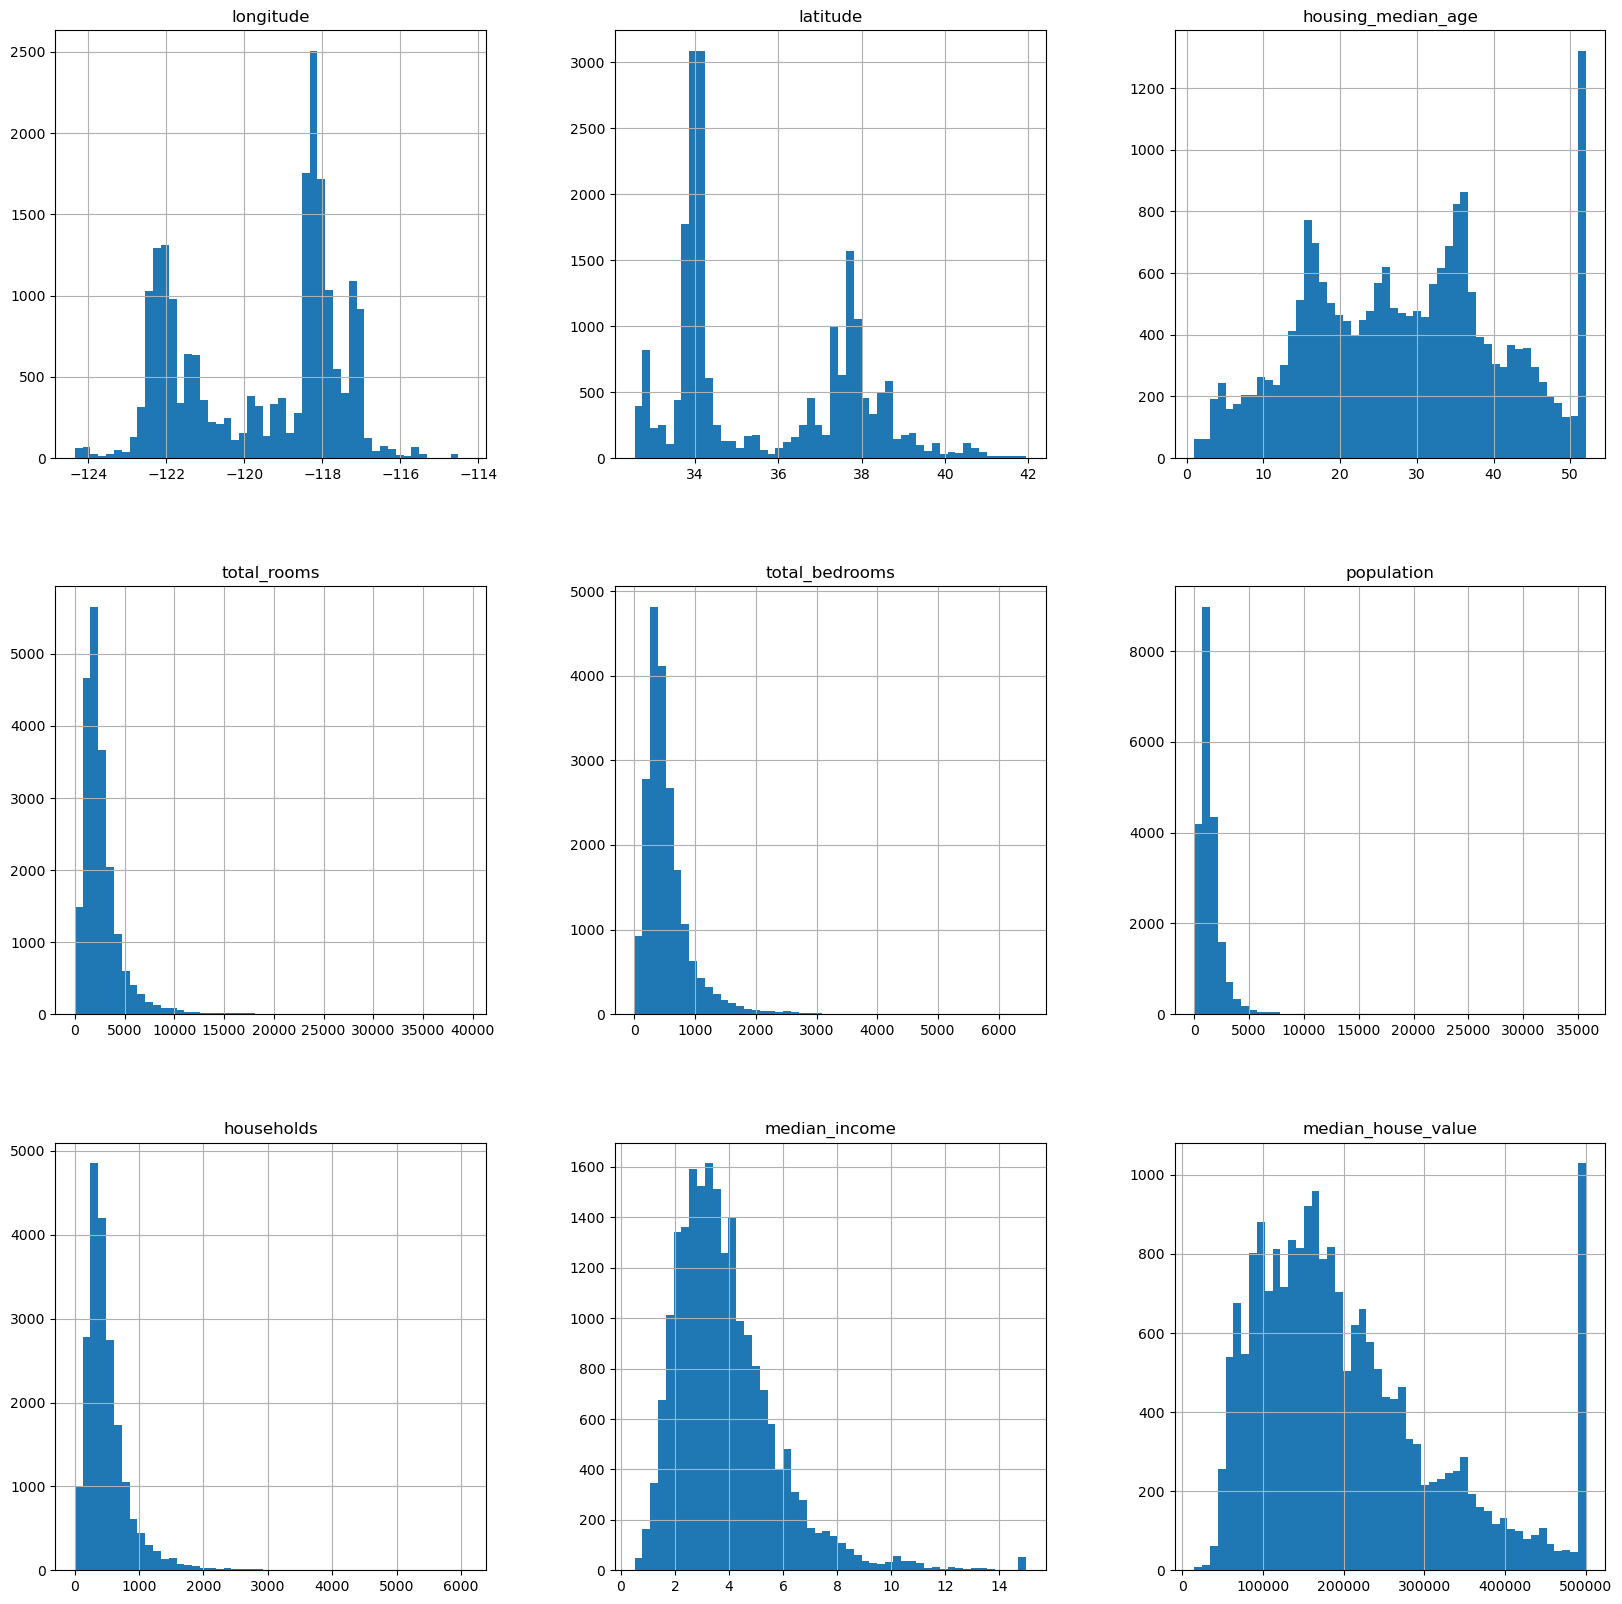

In [334]:
housing.hist(bins=50,figsize = (20,20))

Since the correlation between the median_income is the important feature in predicting the house value we will ensure that while splitting the data into training and testing sets we will split them with the equal values of bins in the both the training and testing set.

This can be done by splitting the median_income into different bins of values and then labelling it.

In [335]:
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins = [0.,1.5,3.0,4.5,6.,np.inf],
                              labels = [1,2,3,4,5])


Then using StratifiedShuffleSplit from sklearn.model_selection we will split the data into training and test sets based on the test_size.

In [336]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2 , random_state = 42)

In the below code we will get the index for the train and test set splitting based on the income_cat column produced before.

In [337]:
for train_index , test_index in split.split(housing , housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

After splitting the data the income_cat column is dropped since there is no further use of it.

In [338]:
strat_train_set.drop("income_cat",axis = 1 ,inplace = True)
strat_test_set.drop("income_cat",axis = 1 ,inplace = True)

In [339]:
strat_train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [340]:
strat_test_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Making a copy of the stratified training set to the housing_train

In [341]:
housing_train = strat_train_set.copy()

Plotting the graph based on the latitude and longitude values.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

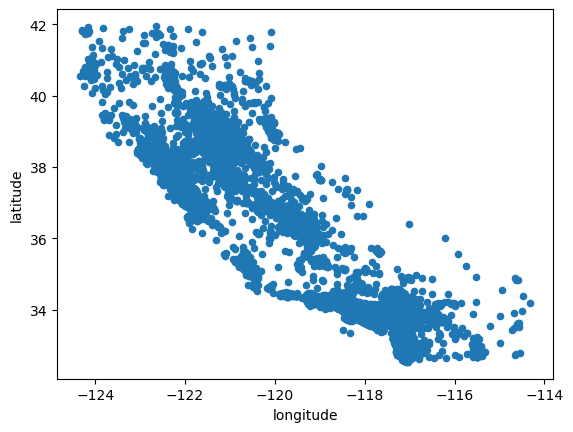

In [342]:
housing_train.plot(kind = "scatter" , x = 'longitude' , y = 'latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

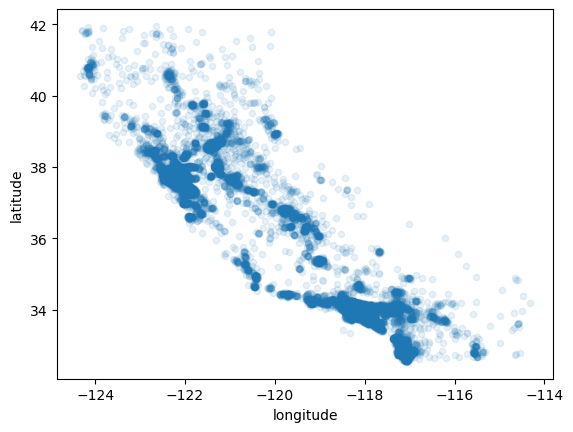

In [343]:
housing_train.plot(kind = "scatter" , x = 'longitude',y = 'latitude',alpha = 0.1)

Here the size of the circle represents the size the population in that area and the color scale represents the median_house_value in that area with blue as the lowest and the red as the highest median_house_value.

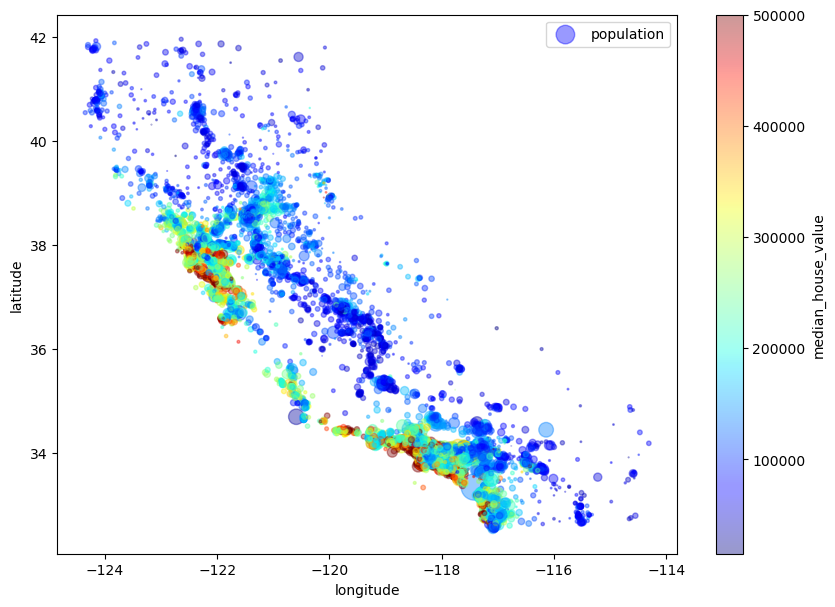

In [344]:
housing_train.plot(kind = "scatter" , x = 'longitude',y = 'latitude',alpha = 0.4,
                  s = housing_train['population']/100 , label = 'population' , figsize = (10,7),
                  c = 'median_house_value' , cmap = plt.get_cmap("jet"),colorbar = True)
plt.legend()

Finding the correlation between the different features.

In [345]:
corr_mat = housing_train.corr()
corr_mat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


Finding the correlation between the mediana_house_value with all other features.
medain_income is high positively correlated with in median_house_value and the latitude is high negative correlated with the median_house_value.

In [346]:
corr_mat['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Scatter matrix is an another type to view the correlation between different columns in the graph visualization.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_bedrooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='tota

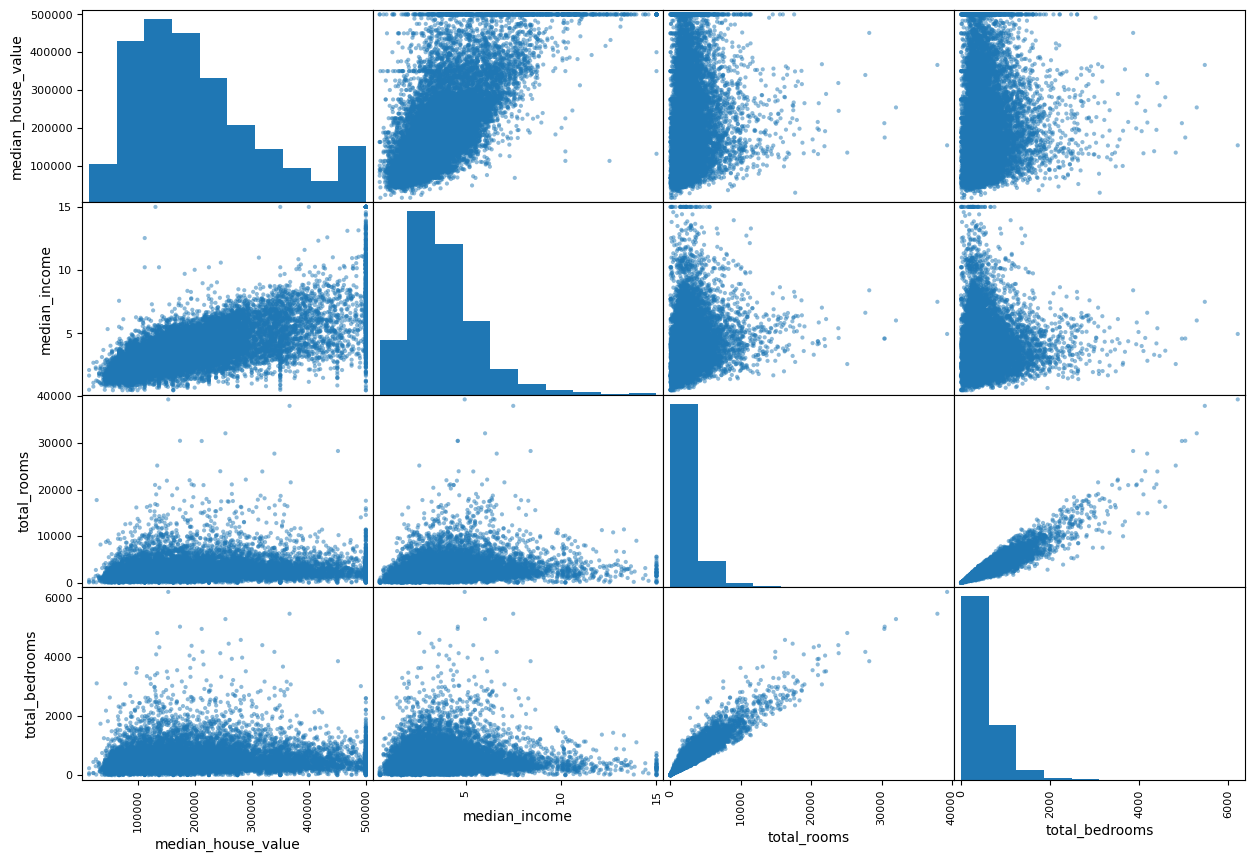

In [347]:
from pandas.plotting import scatter_matrix

attr = ['median_house_value' , 'median_income' , 'total_rooms','total_bedrooms']
scatter_matrix(housing_train[attr],figsize=(15,10))

# Feature Engineering

Creating new features based on the features that are already present.

In [348]:
housing_train['rooms_per_household'] = housing_train['total_rooms'] / housing_train['households']
housing_train['bedrooms_per_household'] = housing_train['total_bedrooms'] / housing_train['total_rooms']
housing_train['population_per_household'] = housing_train['population'] / housing_train['households']

Now finding the correlation for the dataframe with new added columns.

In [349]:
corr_mat = housing_train.corr()

Now the coorelation between the rooms_per_household and the median_house_value is high positive correlated and the bedrooms_per_household is high negative correlated which means that the feature created using the already existing ones make more sense.

In [350]:
corr_mat['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_household     -0.259952
Name: median_house_value, dtype: float64

Dropping the label value from the training set.

In [351]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# Handling missing values

## Handling Missing Values

There are number of methods to handle missing values, but basically, everything we ca do fall into the following:

* Removing the missing values
* Filling the missing values
* Leaving the missing values as they are.


Starting from the first one, if you were to remove the missing values, fairly simple. You can do the following, and you are done.

## 1. Removing the missing values

In [352]:
housing.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [353]:
housing_df=housing.copy()

housing_cleaned=housing.dropna()

In [354]:
housing_cleaned.isnull().sum()

#Same as housing_cleaned.isna().sum

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

Now, we are done but we lost data :). Using the above method, we have removed all rows in which the concerned feature miss values. You can see the results that we no longer have any missing value in `total_bedroom`. 

## 2. Filling the missing values

### A. Constant or Number Fill

With Pandas, filling the missing values is very straight. Here is how you can fill the any missing value with a given number.

In [355]:
housing_filled=housing.fillna(3)

In [356]:
housing_filled.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

Now we will get all the numerical columns from the dataframe and store it seperately.

### B. Mean or Median Imputation

Another strategy that you may want to use in filling the missing values by mean or median of the values in a feature. 

In this case, we will use `Scikit-Learn imputer method` to handle this.

In [357]:
housing_num.info()

NameError: name 'housing_num' is not defined

In [358]:
housing_num = housing.drop('ocean_proximity',axis = 1)

Using simpleImputer from the sklearn.impute we will fill all the numerical missing values with the median of that value.

In [359]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')
# imputer = SimpleImputer(strategy = 'mean')

X = imputer.fit_transform(housing_num)

In [360]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [361]:
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

Converting the matrix which is returned from the imputer into the dataframe using the below code.

In [362]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [363]:
housing_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,6.297405,0.183835,2.411178


# Handling categorical variables

Storing the categorical variable in the housing_cat.

In [364]:
housing_cat = pd.DataFrame(housing_train['ocean_proximity'])
housing_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


Using OneHotEncoder from the sklearn.preprocessing to encode all the categorical variables into numerical ones.

In [365]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
housing_cat_1hot = onehotencoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

OneHotEncoder returns the result as a sparse matrix, we are converting that into an array using pandas toarray() method.

In [366]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# Creating pipeline

Creating a pipeline to preprocess the numerical data.

In [367]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [368]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
housing_prepared = full_pipeline.fit_transform(housing)

# Fitting the model

## Simple Linear Regression

### Simple linear regression can be described by only two parameters: slope `m` and intercept `b`, where `x` is our **median income**. Lets take a look at the formulas below:

### $$\hat{y} = mx + b$$

### $$m = \frac{\overline{x} .\overline{y}-\overline{xy}}{(\overline{x})^2 - \overline{x^2}} \quad \textrm{and} \quad  b = y-mx$$

If we want to add some other features, like size of the apartment, our formula would look like this: $\hat{y} = m_1x_1 + m_2x_2 + b$, where $m_1$ and $m_2$ are slopes for each feature $x_1$ and $x_2$. In this case we would call it multiple linear regression, but we could no longer use formulas above.

In [369]:
from statistics import mean 
class SimpleLinearRegression:
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.m = ((np.mean(X) * np.mean(y) - np.mean(X*y)) / ((np.mean(X)**2) - np.mean(X**2)))
        self.b = np.mean(y) - self.m * np.mean(X)
        print(self.X) # self -> to the linear regression - mammals as a class, multiple animals 
        # fit -> once you call fit, your prediction has access to the objects of fit .... 
        
    def coeffs(self):
        return self.m, self.b
    
    def predict(self): # you normally pass to predict a new x -> test data ... 
        self.y_pred = self.m * self.X + self.b # m slope, x slope, b biased 
        print (self.X)
        return self.y_pred

     
    def r_squared(self):
        self.y_mean = np.full((len(self.y)), mean(self.y))
        err_reg = sum((self.y - self.y_pred)**2)
        err_y_mean = sum((self.y - self.y_mean)**2)
        return (1 - (err_reg/err_y_mean))

In [370]:
X = housing_train["ocean_proximity"] # x as training data
y = housing_labels

In [371]:
lr = SimpleLinearRegression()

In [372]:
lr.fit(X, y) # ASKING the model to train 

TypeError: Could not convert INLANDNEAR OCEANINLANDNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDNEAR BAYINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR BAYINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDNEAR BAY<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLAND<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAY<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDINLANDINLANDNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAYINLANDINLANDINLANDINLANDNEAR OCEANNEAR BAY<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLANDINLANDNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR BAYNEAR OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDNEAR BAYINLANDNEAR BAYNEAR BAY<1H OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANNEAR OCEANINLAND<1H OCEANNEAR BAYNEAR OCEANINLANDNEAR BAYNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDNEAR OCEANNEAR BAYINLAND<1H OCEANNEAR OCEANINLANDNEAR BAYNEAR BAYINLANDINLANDINLANDNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDINLANDINLANDNEAR OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYINLANDINLANDINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR BAYINLAND<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEANNEAR BAYNEAR BAY<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANNEAR OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR BAY<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDINLANDNEAR OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLANDINLANDINLANDINLAND<1H OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANNEAR BAYINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEANNEAR BAYNEAR OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDNEAR OCEANNEAR OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYINLANDINLANDINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEANNEAR BAYINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR BAYINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR BAYNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDNEAR OCEAN<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANINLANDNEAR OCEANNEAR BAYINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLANDINLANDINLANDINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANINLANDINLANDINLANDNEAR BAY<1H OCEANINLANDINLANDNEAR BAYNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDINLANDINLANDNEAR BAYINLAND<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANINLAND<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR BAYINLANDNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEANINLANDNEAR OCEANNEAR OCEANINLANDINLANDINLANDINLAND<1H OCEANNEAR BAYINLANDNEAR BAY<1H OCEANINLANDNEAR BAYNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR BAYINLAND<1H OCEANNEAR BAYINLANDNEAR BAYINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEANINLANDINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR BAYINLANDINLANDNEAR BAY<1H OCEANINLANDNEAR OCEANINLANDNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDINLANDINLANDNEAR OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR BAYINLANDINLANDINLANDNEAR BAYINLANDINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDNEAR OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANNEAR BAY<1H OCEANINLANDNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLANDNEAR OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEANNEAR OCEANNEAR BAY<1H OCEANNEAR OCEANINLANDNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAYNEAR BAYINLAND<1H OCEAN<1H OCEANISLANDNEAR BAYINLANDINLAND<1H OCEANNEAR OCEANINLANDNEAR OCEANINLANDNEAR BAYINLANDINLANDINLANDNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEANNEAR OCEANINLANDINLANDINLANDNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR BAYNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAYNEAR OCEANNEAR OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR BAY<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANINLANDINLANDNEAR OCEANINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANINLANDNEAR OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDINLANDINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR BAYINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANINLAND<1H OCEANNEAR OCEANINLANDNEAR BAYNEAR BAYNEAR BAYNEAR BAY<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDNEAR OCEANNEAR BAYNEAR BAY<1H OCEANNEAR OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR BAYINLANDINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR BAY<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAYINLANDINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR BAY<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEANINLANDINLANDNEAR BAYNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANINLANDNEAR BAY<1H OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEANNEAR BAYNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDNEAR BAYINLANDINLANDINLANDNEAR BAYINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDNEAR OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR OCEANINLANDINLANDINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLANDINLANDINLAND<1H OCEANINLANDNEAR OCEANNEAR BAYNEAR OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDINLANDINLANDINLAND<1H OCEANNEAR BAYINLAND<1H OCEANINLANDNEAR BAY<1H OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANNEAR BAYINLANDNEAR BAY<1H OCEANNEAR BAYINLANDNEAR BAYINLANDNEAR BAYNEAR BAYINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR BAYINLANDNEAR OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANNEAR OCEANINLANDINLANDINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR BAYINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANNEAR OCEANINLANDNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR BAY<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDNEAR OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR BAY<1H OCEANNEAR BAYINLANDNEAR BAYINLANDINLANDINLANDINLANDINLAND<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEANNEAR BAYNEAR BAYINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDNEAR OCEANINLANDINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAYINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANINLANDINLANDNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR OCEANINLANDINLANDNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR BAYINLANDINLANDINLANDNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLANDINLANDNEAR BAYNEAR OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR OCEANNEAR OCEANINLANDINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR BAY<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANISLANDNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANINLAND<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEANNEAR BAYINLANDINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDNEAR BAYNEAR OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANNEAR BAYINLANDINLANDNEAR BAY<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLANDINLANDNEAR BAYINLANDINLANDINLANDNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEANNEAR OCEANINLAND<1H OCEANNEAR BAYNEAR OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDINLANDNEAR BAYINLANDNEAR OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR BAYINLANDNEAR OCEANNEAR BAYINLANDNEAR OCEANINLANDINLANDINLANDNEAR BAYINLANDNEAR BAYINLAND<1H OCEANNEAR BAYINLANDINLAND<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLAND<1H OCEANNEAR BAYNEAR OCEANINLANDINLANDINLANDINLAND<1H OCEANINLANDNEAR BAYINLANDNEAR BAYINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR BAY<1H OCEANINLANDNEAR BAY<1H OCEANINLANDINLANDNEAR BAYNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDNEAR OCEANINLANDINLAND<1H OCEANNEAR BAYNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAYINLANDNEAR BAYINLANDNEAR OCEANNEAR OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANNEAR OCEANINLANDINLANDINLANDINLANDINLANDNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAY<1H OCEANINLAND<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR BAY<1H OCEANINLANDINLANDNEAR BAY<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR BAYNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR BAYINLANDINLAND<1H OCEANINLANDNEAR BAYNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLANDNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLANDINLANDNEAR OCEANNEAR OCEAN<1H OCEANINLANDNEAR BAYNEAR BAYNEAR BAYINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLANDINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAYINLANDINLANDINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEANINLANDINLANDNEAR BAYINLAND<1H OCEANNEAR BAYINLANDNEAR OCEANNEAR OCEANNEAR BAYINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDNEAR BAYINLANDNEAR OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR BAY<1H OCEANNEAR OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANINLANDNEAR BAYINLANDNEAR BAY<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR OCEANNEAR BAYNEAR OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANINLANDINLANDNEAR BAYINLANDINLAND<1H OCEANINLANDINLANDNEAR BAY<1H OCEANNEAR BAYINLANDINLANDINLAND<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEANNEAR BAYNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDNEAR BAY<1H OCEANNEAR BAYNEAR BAY<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLANDNEAR BAYINLAND<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDNEAR BAY<1H OCEANNEAR BAYNEAR BAYNEAR OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAYINLANDINLAND<1H OCEANINLANDNEAR OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYINLANDINLANDINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR BAYINLANDINLAND<1H OCEANINLANDNEAR OCEANNEAR OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANINLANDINLANDINLANDNEAR OCEANINLANDNEAR OCEANNEAR BAYINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDINLANDNEAR BAY<1H OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANINLAND<1H OCEANINLANDINLANDINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANINLANDINLANDNEAR BAYINLAND<1H OCEANINLANDINLANDNEAR BAYINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAYINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANINLANDNEAR BAYNEAR BAYINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR BAYINLANDNEAR OCEANINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR OCEANINLANDNEAR BAYINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDINLANDNEAR BAYINLANDINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEANNEAR BAYNEAR OCEANNEAR OCEANINLAND<1H OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYINLANDINLAND<1H OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR BAYNEAR BAYINLAND<1H OCEANINLANDINLANDINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLANDINLANDNEAR OCEANINLANDINLAND<1H OCEANNEAR OCEANNEAR BAYNEAR OCEANINLANDINLAND<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANNEAR OCEANNEAR BAYINLANDNEAR BAYNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAYINLANDNEAR BAYINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDNEAR OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDINLAND<1H OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEANINLAND<1H OCEANNEAR BAYNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR BAYNEAR OCEANNEAR BAYINLANDINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAYINLANDINLANDINLANDINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR BAYINLANDINLANDNEAR OCEANINLANDNEAR OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAYINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYINLANDINLAND<1H OCEANINLANDNEAR OCEANINLANDNEAR BAYNEAR BAY<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANINLANDINLANDINLANDNEAR OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANINLANDINLANDINLANDINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEANNEAR OCEANNEAR OCEANINLANDNEAR BAYNEAR BAYINLANDINLANDNEAR OCEANINLANDINLANDINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDNEAR BAYINLANDINLANDINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDINLANDINLANDINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDINLANDNEAR BAYINLAND<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANINLANDNEAR BAYINLANDINLAND<1H OCEANINLANDINLANDNEAR OCEANNEAR BAYNEAR OCEANINLAND<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANNEAR OCEANINLAND<1H OCEANNEAR BAYINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDNEAR OCEAN<1H OCEANNEAR BAYINLANDINLANDNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEANNEAR BAYNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEANINLANDINLANDINLANDINLANDINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR BAYINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDNEAR OCEANNEAR BAY<1H OCEANINLANDINLANDINLANDINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDINLANDNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAYNEAR BAYNEAR BAYINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDINLANDNEAR BAYNEAR OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANINLANDNEAR BAYNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEANNEAR OCEANINLANDNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYNEAR OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLANDNEAR BAYINLAND<1H OCEANINLANDNEAR OCEANINLANDINLAND<1H OCEANINLANDNEAR BAYINLANDNEAR BAYNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAYNEAR BAY<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANNEAR OCEANNEAR BAYINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLANDINLAND<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLANDINLANDNEAR BAYINLANDNEAR BAY<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR BAY<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDNEAR OCEANINLANDINLANDINLANDNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR BAY<1H OCEANNEAR BAYNEAR OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLANDNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLANDINLANDNEAR OCEANNEAR OCEANINLAND<1H OCEANINLANDINLANDNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEANNEAR BAYINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANINLANDNEAR OCEANINLANDNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR BAYINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEANNEAR BAYNEAR BAYNEAR OCEANINLANDINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLANDNEAR OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYNEAR OCEANINLAND<1H OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR BAYNEAR BAYINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDNEAR OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYINLANDNEAR BAYINLANDINLANDINLANDNEAR BAY<1H OCEANNEAR BAYINLANDINLANDNEAR OCEAN<1H OCEANINLANDINLANDNEAR OCEANINLANDINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLAND<1H OCEANINLANDINLANDNEAR BAYINLANDINLANDNEAR BAYINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR BAYNEAR OCEANNEAR OCEANINLAND<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEANINLANDNEAR BAY<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDNEAR BAYNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR BAY<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR BAYINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDNEAR BAYINLANDINLANDINLAND<1H OCEANINLANDINLANDINLANDINLAND<1H OCEANINLANDINLANDINLANDINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDINLAND<1H OCEANNEAR OCEANNEAR OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDNEAR BAY<1H OCEANNEAR OCEANINLANDNEAR BAYNEAR BAYINLANDINLANDNEAR OCEANNEAR BAYINLAND<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEANNEAR BAYINLANDNEAR BAY<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR OCEANINLAND<1H OCEANNEAR BAYNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDNEAR BAYNEAR BAYINLANDNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANINLANDINLANDNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEANINLANDNEAR BAYNEAR BAY<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDNEAR OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR BAYNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDINLANDNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAYINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEANNEAR OCEANINLANDINLANDNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEANNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANINLANDNEAR OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAYNEAR BAY<1H OCEANNEAR BAYNEAR BAYINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAYNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEANINLANDINLANDINLANDNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEANINLANDINLANDINLANDINLANDINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANINLAND<1H OCEANNEAR OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR BAY<1H OCEANNEAR BAYNEAR OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDINLANDNEAR OCEANNEAR OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR BAYNEAR BAYNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR BAYINLANDNEAR OCEANINLANDNEAR OCEANINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEANNEAR BAYNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANINLANDINLANDNEAR BAYNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANINLANDNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR BAYINLANDINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR BAYNEAR OCEANNEAR BAYNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDNEAR BAYNEAR BAY<1H OCEANINLANDINLANDINLANDINLANDNEAR OCEANNEAR OCEANNEAR BAY<1H OCEANNEAR OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANINLAND<1H OCEANNEAR BAYINLANDNEAR BAYNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDNEAR BAYNEAR BAYINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLANDNEAR BAY<1H OCEANNEAR BAYINLANDINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDINLANDINLANDNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR BAY<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR BAYNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLANDNEAR BAYNEAR BAY<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAYINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR BAYNEAR OCEANNEAR BAYNEAR OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEANINLANDINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR BAYNEAR BAYNEAR OCEANNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDNEAR BAYINLANDNEAR BAY<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANNEAR BAYNEAR OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR BAYINLAND<1H OCEANINLANDINLANDNEAR OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYNEAR BAY<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDNEAR BAYNEAR OCEANINLAND<1H OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEANINLANDNEAR BAYNEAR BAY<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR BAYINLANDINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAYNEAR BAYINLANDINLANDINLANDINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLANDNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLANDINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEANNEAR BAYNEAR BAYINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANNEAR OCEANINLANDNEAR OCEANNEAR OCEANINLANDNEAR OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLANDNEAR OCEANNEAR OCEANNEAR BAY<1H OCEANNEAR BAYNEAR BAYINLANDNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLANDNEAR BAY<1H OCEANINLANDNEAR BAYNEAR BAYNEAR BAYINLANDINLANDNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLANDNEAR OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR BAYNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR BAYINLANDNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANINLANDNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDNEAR OCEANINLANDINLANDNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANNEAR BAYNEAR OCEANINLANDINLANDINLANDNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEANNEAR BAYNEAR BAY<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEANINLANDNEAR BAYINLANDINLAND<1H OCEANNEAR BAY<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR BAYINLANDINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR BAYINLANDNEAR BAY<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR BAYNEAR BAYINLAND<1H OCEANNEAR OCEANNEAR BAY<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANINLAND<1H OCEANNEAR BAY<1H OCEANNEAR BAYNEAR BAYINLANDINLAND<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR BAYINLANDINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANINLANDINLANDNEAR BAYNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDNEAR OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR BAYINLANDINLAND<1H OCEANNEAR BAYNEAR BAYINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEANNEAR OCEANINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANINLANDNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANNEAR BAYINLANDNEAR OCEANINLANDINLANDNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAYINLANDNEAR BAYINLAND<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR OCEANNEAR BAYINLANDNEAR BAY<1H OCEANNEAR OCEANINLANDINLANDNEAR BAYNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLANDINLANDINLANDINLAND<1H OCEANINLANDINLANDINLANDINLANDNEAR OCEAN<1H OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEANINLANDNEAR BAYNEAR BAYNEAR BAY<1H OCEANINLANDINLANDNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANINLANDNEAR BAY<1H OCEANINLANDNEAR BAYNEAR OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR BAYNEAR BAYINLANDNEAR BAY<1H OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANINLANDNEAR OCEANINLANDINLANDNEAR BAY<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR BAY<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANINLANDNEAR BAYINLAND<1H OCEANNEAR OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEANNEAR OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAYNEAR BAYNEAR BAYNEAR OCEANNEAR OCEANNEAR OCEANINLANDNEAR OCEANINLANDNEAR OCEANINLANDINLANDINLANDNEAR BAYNEAR BAYINLANDINLANDNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANNEAR OCEANNEAR OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR BAYNEAR BAYNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDINLANDNEAR BAY<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR BAYINLANDNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR BAYINLANDNEAR BAYNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLANDINLANDINLANDINLANDINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR BAYINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAYNEAR OCEANINLANDINLAND<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAYINLANDINLANDNEAR BAYINLANDNEAR BAY<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANINLANDINLANDNEAR OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEANINLANDNEAR BAYINLANDNEAR BAYINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR BAYINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR OCEANINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANINLAND<1H OCEANINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDINLANDINLANDINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDINLANDNEAR BAY<1H OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR BAYNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEANINLANDNEAR OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEANINLANDINLANDINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANNEAR OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR BAYINLANDINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR BAYINLAND<1H OCEANINLANDNEAR OCEANNEAR BAYNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLANDINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANINLANDNEAR BAYNEAR BAY<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLANDINLANDNEAR BAYNEAR OCEANNEAR BAYINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYINLANDINLANDINLANDNEAR OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANNEAR BAY<1H OCEANINLANDNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAYINLANDINLANDNEAR BAYNEAR BAYNEAR BAYNEAR BAY<1H OCEANNEAR OCEANINLANDNEAR OCEANINLANDINLAND<1H OCEANINLANDNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR OCEANINLANDNEAR OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDINLANDINLANDINLANDNEAR OCEANINLANDNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEANINLANDINLANDNEAR BAYINLANDINLANDNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANINLANDINLANDINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANNEAR BAYINLANDINLANDINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANINLANDINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEANINLANDNEAR BAYNEAR BAY<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANINLANDNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR OCEANNEAR BAY<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR BAYINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLANDNEAR BAYNEAR OCEANINLANDINLAND<1H OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEANNEAR BAY<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR BAYINLANDNEAR BAYINLANDINLAND<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEANNEAR OCEANNEAR BAY<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEANNEAR BAYNEAR BAYINLANDNEAR OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR BAYINLANDINLANDNEAR OCEANNEAR OCEAN<1H OCEANINLANDINLANDNEAR OCEANNEAR OCEANINLAND<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDNEAR BAYINLANDINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANINLANDNEAR OCEANINLANDNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR OCEANINLANDNEAR BAYNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDNEAR BAYNEAR OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR BAYINLANDINLANDNEAR BAY<1H OCEANINLANDNEAR BAYINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEANNEAR BAYNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR BAYINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR OCEANINLANDINLANDNEAR BAYNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR OCEANNEAR BAY<1H OCEANINLANDINLANDINLAND<1H OCEANINLANDINLANDINLANDNEAR BAYINLANDNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLANDINLANDINLAND<1H OCEANNEAR BAYNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDINLANDINLAND<1H OCEANINLANDNEAR BAYNEAR BAYINLANDNEAR BAYNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAYINLANDINLAND<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR BAYNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANINLANDNEAR BAYINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDINLANDNEAR OCEANNEAR OCEANNEAR BAYNEAR BAY<1H OCEANNEAR OCEANINLANDINLANDINLANDNEAR OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR BAYNEAR BAYINLANDINLANDNEAR OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR BAY<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANINLANDNEAR BAY<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLANDNEAR BAYINLAND<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDINLANDNEAR BAY<1H OCEANNEAR BAYINLANDINLAND<1H OCEANNEAR BAYINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR OCEANNEAR BAYINLANDINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR BAYINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANINLANDNEAR OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDNEAR BAYINLANDNEAR BAYINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEANINLANDINLANDINLAND<1H OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANINLANDNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR OCEANINLAND<1H OCEANNEAR OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDINLAND<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR BAYINLANDNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDNEAR BAYINLAND<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLANDINLANDINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDINLANDINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANINLAND<1H OCEANNEAR OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLANDNEAR OCEANINLANDNEAR BAY<1H OCEANNEAR OCEANNEAR OCEANINLAND<1H OCEANNEAR BAYNEAR OCEANINLANDINLANDNEAR BAYINLANDINLAND<1H OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANINLANDINLANDINLANDINLANDINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYINLANDINLANDINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR BAYINLANDNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR BAYINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDNEAR BAYINLANDNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLANDNEAR OCEANNEAR OCEANINLANDINLANDNEAR BAY<1H OCEANINLANDINLANDINLANDNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEANINLAND<1H OCEANINLANDNEAR BAYINLANDINLAND<1H OCEANNEAR BAYNEAR BAYINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEANINLANDINLANDINLANDNEAR BAYNEAR OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANINLAND<1H OCEANNEAR OCEANINLANDNEAR BAYINLANDNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR BAY<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLANDINLANDNEAR OCEANNEAR OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEANINLANDNEAR OCEANINLANDNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR BAYINLANDINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEANINLANDNEAR BAYINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDINLANDNEAR BAY<1H OCEANNEAR OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDNEAR OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAYNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLANDNEAR OCEANNEAR BAYNEAR OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR BAYNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANNEAR OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANINLANDINLANDNEAR OCEANINLANDINLANDINLANDINLANDINLANDNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANNEAR OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEANINLANDINLANDNEAR OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR BAY<1H OCEANNEAR OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDNEAR OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR BAY<1H OCEANINLANDNEAR BAYNEAR BAYNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR BAYINLANDNEAR OCEANINLAND<1H OCEANINLANDNEAR OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR BAYINLANDINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLANDINLANDINLANDNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDINLANDNEAR BAYINLANDINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANNEAR BAYINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR BAYNEAR BAY<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAY<1H OCEANNEAR BAYINLANDNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR OCEANINLANDNEAR BAYINLANDINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANNEAR BAY<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDNEAR BAYNEAR BAYNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDNEAR OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEANINLANDNEAR OCEANINLANDINLANDINLAND<1H OCEANNEAR BAYINLANDNEAR BAYNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEANNEAR OCEANNEAR BAY<1H OCEANINLANDINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYNEAR OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAYINLANDNEAR BAYNEAR BAYNEAR BAYNEAR OCEANINLANDINLAND<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR BAYINLANDNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDNEAR BAYNEAR BAY<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANINLANDINLANDNEAR BAYINLAND<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDINLANDINLANDNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR BAYINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDINLANDNEAR OCEANNEAR BAYNEAR OCEANNEAR OCEANNEAR OCEANINLANDNEAR OCEANNEAR OCEANNEAR BAYNEAR OCEAN<1H OCEANINLANDINLANDNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANNEAR BAYNEAR BAY<1H OCEANNEAR OCEANINLANDNEAR OCEANINLAND<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDINLANDNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANINLANDINLANDNEAR BAYINLANDNEAR BAY<1H OCEANINLANDINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEANINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR BAYINLANDINLANDNEAR OCEANNEAR OCEANINLANDINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDINLANDNEAR BAYINLANDINLANDINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYNEAR BAYINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDNEAR OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYNEAR BAY<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLANDNEAR BAYINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANNEAR OCEANINLANDNEAR BAYNEAR BAYINLANDNEAR BAYNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYINLANDINLANDNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDINLANDNEAR BAYINLANDNEAR OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAYINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANINLAND<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR BAYINLANDNEAR OCEANNEAR BAYNEAR OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAY<1H OCEANINLANDNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANNEAR BAYINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAYNEAR BAYINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR BAYINLANDNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEANNEAR OCEANNEAR BAYNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR BAYINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANINLANDINLANDINLANDNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDINLAND<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLANDINLANDNEAR OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR BAYNEAR OCEANINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR BAYNEAR BAYINLANDINLANDNEAR OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR BAYNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANNEAR BAYINLANDINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR BAY<1H OCEANNEAR BAYNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANNEAR BAYINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR BAYINLANDNEAR BAY<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR BAYINLAND<1H OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR OCEANINLANDINLANDNEAR BAYINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR BAYINLANDINLANDNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYNEAR BAYNEAR BAY<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAYINLANDNEAR OCEANINLAND<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLANDNEAR OCEANINLANDINLAND<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR BAYINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLANDINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEANINLANDINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANINLANDINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANINLANDINLANDNEAR BAYINLANDNEAR BAYNEAR OCEANINLANDINLANDINLAND<1H OCEANINLANDINLANDNEAR BAY<1H OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLANDNEAR OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDNEAR BAYNEAR BAYNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLANDNEAR BAYINLANDNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEANINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDNEAR BAYINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR BAYINLANDNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLANDINLANDNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANINLANDNEAR BAY<1H OCEANINLANDNEAR OCEANINLANDNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEANNEAR OCEANNEAR BAYINLANDINLANDNEAR BAYNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR BAYNEAR BAYNEAR OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLANDINLAND<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAYNEAR BAYINLANDINLANDNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEANINLANDINLANDNEAR BAY<1H OCEANNEAR BAYNEAR BAY<1H OCEANINLANDNEAR OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANINLANDNEAR BAY<1H OCEANINLANDNEAR OCEANINLANDNEAR BAYINLANDNEAR BAYNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR OCEANNEAR OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDINLANDINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDINLANDNEAR OCEANINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDINLANDNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDNEAR OCEANNEAR OCEANNEAR BAYINLANDNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANINLANDNEAR BAYINLANDNEAR OCEANINLANDINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR BAYINLANDNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLAND<1H OCEANINLANDINLANDNEAR BAYINLANDINLAND<1H OCEANNEAR BAYNEAR OCEANINLANDNEAR OCEANINLAND<1H OCEANINLANDINLANDNEAR BAYNEAR BAY<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEANINLANDNEAR OCEANINLAND<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAY<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDNEAR OCEAN<1H OCEANINLANDNEAR BAYINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAYINLAND<1H OCEANINLANDINLANDNEAR BAYNEAR OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDINLANDNEAR BAY<1H OCEANINLANDINLANDINLANDINLANDNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANNEAR BAYINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR BAYINLANDINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR OCEANNEAR OCEANINLANDINLANDNEAR BAYNEAR OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDINLANDINLANDNEAR OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEANNEAR BAYINLANDNEAR BAYNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAY<1H OCEANNEAR BAYNEAR OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLAND<1H OCEANINLANDNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLANDINLANDNEAR BAY<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDINLANDINLANDNEAR BAYNEAR BAYINLANDINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEANNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDNEAR OCEANINLANDNEAR OCEANINLANDNEAR BAY<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAYNEAR BAYINLAND<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEANNEAR OCEANNEAR BAYNEAR OCEANNEAR BAY<1H OCEANINLAND<1H OCEANNEAR OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDNEAR OCEANINLANDNEAR BAYINLANDNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYINLANDINLANDNEAR OCEAN<1H OCEANINLANDINLANDNEAR BAYINLANDINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDNEAR BAYINLAND<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR BAYINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDINLANDINLANDNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANNEAR OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR BAYNEAR BAYINLAND<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANINLANDINLAND<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAYINLANDNEAR OCEANNEAR BAYINLAND<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANINLANDNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAYNEAR BAYNEAR BAYINLANDNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDNEAR BAYNEAR OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDNEAR BAYNEAR BAY<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANINLANDNEAR OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAY<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANNEAR BAYNEAR BAY<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR BAY<1H OCEANINLANDNEAR BAY<1H OCEANNEAR OCEANINLANDNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDINLANDNEAR BAYINLANDINLAND<1H OCEANNEAR OCEANINLANDNEAR BAY<1H OCEANNEAR OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANINLANDINLANDNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR BAYINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEANNEAR BAYINLANDNEAR BAYNEAR OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR BAY<1H OCEANNEAR BAYNEAR OCEANINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAYINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLANDINLAND<1H OCEANINLANDINLANDNEAR OCEANNEAR OCEANNEAR OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEANINLANDNEAR OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDNEAR OCEANINLANDNEAR OCEANINLANDNEAR BAY<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANNEAR BAYNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEANINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANINLANDINLANDINLANDINLANDINLANDNEAR BAYINLAND<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR BAY<1H OCEANNEAR OCEANINLANDINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR BAYINLAND<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANNEAR OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEANINLANDINLANDINLANDNEAR OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR BAYNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANNEAR BAYINLANDNEAR OCEANINLANDNEAR BAY<1H OCEANINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR BAYINLANDNEAR OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEANINLANDINLAND<1H OCEANINLANDINLANDNEAR BAYNEAR BAY<1H OCEANNEAR OCEAN<1H OCEANNEAR BAYNEAR OCEANNEAR OCEANINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAYINLANDINLANDINLANDINLAND<1H OCEANINLAND<1H OCEANINLANDNEAR BAYINLAND<1H OCEANNEAR OCEANINLAND<1H OCEANNEAR BAYINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEANINLANDINLANDNEAR BAYINLANDINLANDINLANDNEAR OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDNEAR OCEANINLANDNEAR OCEANINLANDINLAND<1H OCEANNEAR OCEANINLANDNEAR BAYNEAR OCEANINLANDINLANDINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAYNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDNEAR BAY<1H OCEANNEAR BAYINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEANINLANDNEAR BAY<1H OCEANINLANDINLAND<1H OCEANNEAR BAYNEAR BAYINLAND<1H OCEAN<1H OCEANINLANDNEAR BAYINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANINLANDNEAR BAYINLANDNEAR BAY<1H OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAYINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDNEAR BAYINLAND<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDNEAR BAY<1H OCEANNEAR OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEANNEAR BAY<1H OCEANINLANDNEAR BAYNEAR BAY<1H OCEANINLANDINLANDNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR BAYINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEANNEAR OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANNEAR BAYINLANDINLANDINLANDNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANINLANDNEAR BAYINLANDINLANDINLANDINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR BAY<1H OCEANINLANDNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLANDINLANDNEAR BAYINLANDINLANDNEAR OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANINLANDINLANDINLANDINLANDNEAR OCEANINLANDNEAR BAYINLANDINLAND<1H OCEANINLANDNEAR OCEANINLANDINLANDNEAR BAY<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLANDINLANDNEAR BAY<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAYINLAND<1H OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAYINLANDINLAND<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDINLAND<1H OCEAN<1H OCEANNEAR OCEANINLAND<1H OCEANINLANDNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANNEAR OCEANNEAR BAYNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEANNEAR BAY<1H OCEAN<1H OCEANINLANDNEAR OCEANINLANDNEAR BAY<1H OCEANINLANDINLAND<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEANINLANDNEAR BAYNEAR OCEAN<1H OCEANNEAR BAYNEAR OCEAN<1H OCEANINLANDINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEANINLANDINLAND<1H OCEANNEAR OCEANNEAR OCEANINLANDINLANDNEAR OCEANNEAR BAY<1H OCEANNEAR OCEANNEAR OCEANNEAR OCEANINLANDINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR BAYINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLAND<1H OCEANINLAND<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDNEAR OCEANNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANINLANDINLAND<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR BAY<1H OCEANNEAR BAY<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANNEAR BAYNEAR OCEANNEAR BAYINLANDNEAR OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEAN<1H OCEANNEAR BAY<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANNEAR OCEAN<1H OCEANINLANDINLANDNEAR BAY<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEANNEAR OCEANNEAR BAY<1H OCEAN<1H OCEANNEAR OCEANNEAR OCEANINLAND<1H OCEANINLANDINLANDNEAR OCEANINLAND<1H OCEAN<1H OCEANINLANDNEAR OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEAN<1H OCEANINLANDINLANDNEAR BAYINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANINLANDINLANDINLAND<1H OCEANNEAR OCEANNEAR OCEANINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEANNEAR OCEAN<1H OCEAN<1H OCEANINLANDINLANDINLANDINLAND<1H OCEAN<1H OCEAN<1H OCEANINLAND<1H OCEAN<1H OCEANINLAND to numeric

In [373]:
y_pred = lr.predict() # model learn something , based on the existing data that i have learned let s predict (forcast the prediction )

AttributeError: 'SimpleLinearRegression' object has no attribute 'm'

In [374]:
lr.r_squared() # lr linear regression 

AttributeError: 'SimpleLinearRegression' object has no attribute 'y_pred'

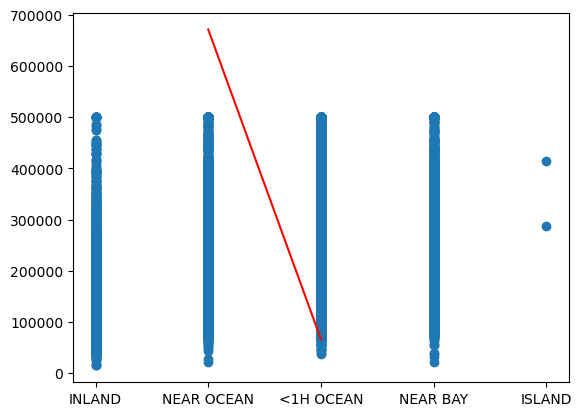

In [375]:
# plotting (for question 2)
plt.scatter(X, y) 
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')  # regression line
plt.show()

## Multivariate Linear Regression

Here we will create a Linear Regression model and fit with the training data.

In [376]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

predicting the value for the test sets in the linear regression model and using the error function root mean squared error.

In [377]:
from sklearn.metrics import mean_squared_error, r2_score

housing_predictions = lin_reg.predict(housing_prepared)
# lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_mse = r2_score(housing_labels, housing_predictions)
 
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.8023764076009697

As linear regression rmse is not very fine we will define a DecisionTreeRegressor and fit the model with training data and predict it.

In [378]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

The model has the rmse value of 0. which says that it will predict with 100% accuracy,but the model overfits the data so that the model only works well on the training data and predicts worst with the unknown values. 

In [379]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

To overcome the overfitting in the training set we will use cross_validation for the decision tree regressor. 

In [380]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

tree_rmse_scores

array([69843.96031795, 69907.34735238, 65193.61558514, 70323.09706993,
       68394.19986258, 69461.1925558 , 73071.73980831, 69168.30775354,
       67341.67685553, 72034.46569954])

Now the rmse score is much worse than the linear regressor but its not overfitting the data.

In [381]:
tree_rmse_scores.mean()

69473.96028606882

Using the cross validation for the linear regressor.

In [382]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores


array([72229.03469752, 65318.2240289 , 67706.39604745, 69368.53738998,
       66767.61061621, 73003.75273869, 70522.24414582, 69440.77896541,
       66930.32945876, 70756.31946074])

In [383]:
lin_rmse_scores.mean()

69204.32275494763

Since both the models rmse values are too high we will try it with the RandomForestRegressor.

In [384]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_score = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring = 'neg_mean_squared_error',cv=5)
forest_rmse_score = np.sqrt(-forest_score)
forest_rmse_score

array([50111.67318355, 48727.32795793, 48955.19841059, 50522.57470686,
       50698.86258231])

Hurray! RandomForestRegressor models rmse value is lower than the all other models but it also not the best score.

In [385]:
forest_rmse_score.mean()

49803.12736824919

AttributeError: 'LinearRegression' object has no attribute 'plot'

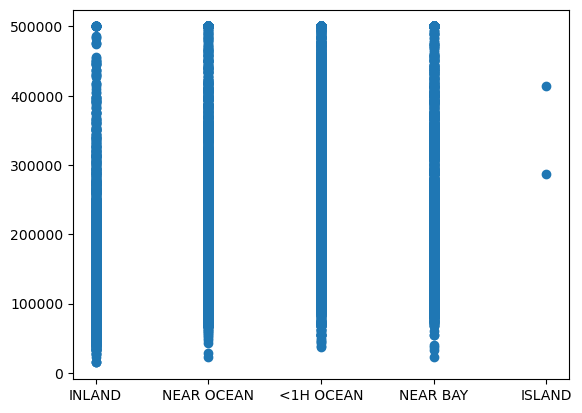

In [386]:
# # plotting 
# we are training


# plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')  # regression line
# lin_reg.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
# lin_reg.show()

import matplotlib.pyplot as plt
plt.scatter(X, y)


# ax.plot(housing_prepared , housing_predictions, color='k', label='Regression model')
# ax.plot(lin_reg, color='k', label='Regression model')

# plt.scatter(housing_prepared, housing_predictions, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
lin_reg.plot()

# ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
# ax.set_xlabel('Porosity (%)', fontsize=14)
# ax.legend(facecolor='white', fontsize=11)
# ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

# fig.tight_layout()



# GridSearchCV

Using the GridSearchCV for finding the best hyperparameter that gives the minimum rmse score.

First we will use GridSearchCV for the RandomForestRegressor with the following list of hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

The best parameters are

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

Viewing the score for all combination of parameters that were used for testing the model.

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
     print(np.sqrt(-mean_score), params)

# Prediction

Predicting the median_house_value using the best estimators in the gridsearch.

In [ ]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("total_rooms", axis=1)
y_test = strat_test_set["total_rooms"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 


The final rmse score for the test set is 47572.

In [ ]:
final_rmse